In [1]:
import open_deep_research   
print(open_deep_research.__version__) 

0.0.10


In [2]:
from IPython.display import Image, display
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.graph import builder

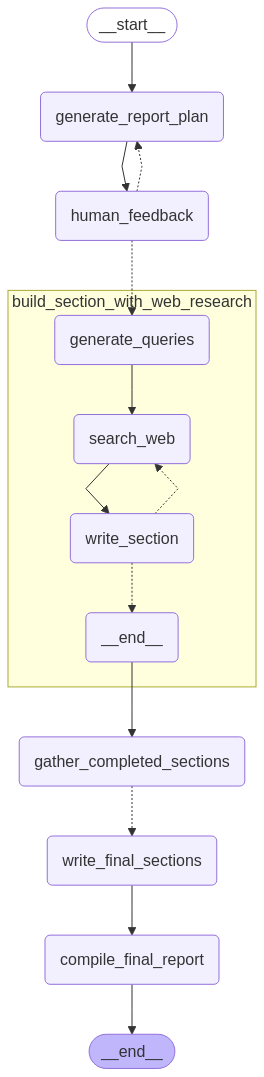

In [3]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [4]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# Set the API keys used for any model or search tool selections below, such as:
# _set_env("OPENAI_API_KEY")
# _set_env("ANTHROPIC_API_KEY")
_set_env("TAVILY_API_KEY")
_set_env("GROQ_API_KEY")
# _set_env("PERPLEXITY_API_KEY")

In [5]:
import uuid 
from IPython.display import Markdown

REPORT_STRUCTURE = """Use this structure to create a report on the user-provided topic in Korean Language:

1. Introduction (no research needed)
   - Brief overview of the topic area

2. Main Body Sections:
   - Each section should focus on a sub-topic of the user-provided topic
   
3. Conclusion
   - Aim for 1 structural element (either a list of table) that distills the main body sections 
   - Provide a concise summary of the report"""

# Fast config (less search depth) with o3-mini for planning and Claude 3.5 Sonnet for writing
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           "search_api": "tavily",
                           "planner_provider": "groq",
                           "planner_model": "gemma2-9b-it",
                           "writer_provider": "groq",
                           "writer_model": "gemma2-9b-it",
                           "max_search_depth": 1,
                           "report_structure": REPORT_STRUCTURE,
                           }}

# Create a topic
topic = "2025년 기준 미국 군함 시장에 대한 한화오션과 현대중공업의 사업 전략을 비교해주세요."

# Run the graph until the interruption
async for event in graph.astream({"topic":topic,}, thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

Please provide feedback on the following report plan. 
                        

Section: Executive Summary
Description: Brief overview of the report's findings and key insights.
Research needed: No


Section: MRO Market Overview
Description: Examines the current state of the US Navy's MRO market, including trends, challenges, and opportunities.
Research needed: Yes


Section: Hanwha Ocean's MRO Strategy
Description: Details Hanwha Ocean's approach to the US Navy MRO market, highlighting its capabilities, experience, and future plans.
Research needed: Yes


Section: Hyundai Heavy Industries' MRO Strategy
Description: Analyzes Hyundai Heavy Industries' strategy for capturing the US Navy MRO market, focusing on its strengths, competitive advantages, and potential partnerships.
Research needed: Yes


Section: Comparative Analysis
Description: Compares and contrasts Hanwha Ocean and Hyundai Heavy Industries' MRO strategies, identifying key differences and potential areas of overlap.
Research needed: No


Section: Outlook and Recommendations
Description: Provides a forward-looking perspective on the US Navy MRO market and offers recommendations for Hanwha Ocean and Hyundai Heavy Industries to enhance their competitive positioning.
Research needed: Yes


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

In [6]:
# Pass feedback to update the report plan  

feedback_msg = """
아래 사항을 포함해주세요.
- 현대중공업업의 필리핀 군함 수출 실적
- 한화오션의 미국 군함 정비 실적적
"""


async for event in graph.astream(Command(resume=feedback_msg), thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

Please provide feedback on the following report plan. 
                        

Section: 미국 군함 시장 현황 및 핵심 전략
Description: 미국 군함 시장의 규모, 성장 전망, 주요 추세 및 미국의 군함 확장 정책과 관련된 정보를 제공합니다. 또한, 한화오션과 현대중공업이 미국 군함 시장에 진출하기 위한 전략을 분석합니다.
Research needed: Yes


Section: 한화오션의 미국 군함 시장 진출 전략
Description: 한화오션의 미국 군함 시장 진출 역사, 주요 사업 사례, 기술력 및 강점을 소개합니다. 특히, MRO 사업 확대, 미국 군함 정비 실적을 중심으로 분석합니다.
Research needed: Yes


Section: 현대중공업의 미국 군함 시장 진출 전략
Description: 현대중공업의 미국 군함 시장 진출 역사, 주요 사업 사례, 기술력 및 강점을 소개합니다. 특히, 필리핀 군함 수출 실적,  이지스함 건조 제안 등을 중심으로 분석합니다.
Research needed: Yes


Section: 한화오션과 현대중공업의 비교분석
Description: 한화오션과 현대중공업의 미국 군함 시장 진출 전략, 사업 성과 및 강점과 약점을 비교분석하여, 각 회사의 경쟁 우위 및 미래 전망을 살펴봅니다.
Research needed: Yes


Section: 결론
Description: 미국 군함 시장에서 한화오션과 현대중공업의 사업 전략, 경쟁 관계 및 미래 전망을 요약하고, 시장 변화에 대한 예측 및 전략적 조언을 제시합니다.
Research needed: No


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

In [7]:
# Pass True to approve the report plan 
async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

{'human_feedback': None}


{'build_section_with_web_research': {'completed_sections': [Section(name='미국 군함 시장 현황 및 핵심 전략', description='미국 군함 시장의 규모, 성장 전망, 주요 추세 및 미국의 군함 확장 정책과 관련된 정보를 제공합니다. 또한, 한화오션과 현대중공업이 미국 군함 시장에 진출하기 위한 전략을 분석합니다.', research=True, content='## 미국 군함 시장 현황 및 핵심 전략 \n\n미국 군함 시장은 2025년 기준 116.46억 달러 규모이며, 2030년까지 159.26억 달러로 성장할 것으로 예상된다[1].  이는 6.46%의 연평균 성장률(CAGR)을 기록하며, 기술 발전과 해양 안보 요구 증대에 따른 변화가 주목된다.  특히, 미국은 해군 전력 강화를 위해 지속적인 투자를 추진하고 있어 시장 성장을 더욱 촉진하는 요인으로 작용하고 있다[2].\n\n한화오션과 현대중공업은 미국 군함 시장 진출을 위해 노력하고 있다. 두 회사는 미국 해군과의 협력 관계를 구축하고 미국 현지 파트너와 협력하여 사업 기회를 확대하고 있다. 특히, 2024년부터 미국 해군의 유지보수 (MRO) 사업에 진출하여 군함 보수 및 수리 분야에서 경쟁력을 강화하고 있다[3,4].\n\n\n### Sources\n\n[1] Mordor Intelligence. (2023). Naval Vessels Market Report. https://www.mordorintelligence.com/industry-reports/naval-vessels-market\n\n[2] Mordor Intelligence. (2023). North America Naval Vessels Market Size & Share Analysis. https://www.mordorintelligence.com/industry-reports/north-america-naval-vess

In [8]:
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)

## 미국 군함 시장 현황 및 핵심 전략 

미국 군함 시장은 2025년 기준 116.46억 달러 규모이며, 2030년까지 159.26억 달러로 성장할 것으로 예상된다[1].  이는 6.46%의 연평균 성장률(CAGR)을 기록하며, 기술 발전과 해양 안보 요구 증대에 따른 변화가 주목된다.  특히, 미국은 해군 전력 강화를 위해 지속적인 투자를 추진하고 있어 시장 성장을 더욱 촉진하는 요인으로 작용하고 있다[2].

한화오션과 현대중공업은 미국 군함 시장 진출을 위해 노력하고 있다. 두 회사는 미국 해군과의 협력 관계를 구축하고 미국 현지 파트너와 협력하여 사업 기회를 확대하고 있다. 특히, 2024년부터 미국 해군의 유지보수 (MRO) 사업에 진출하여 군함 보수 및 수리 분야에서 경쟁력을 강화하고 있다[3,4].


### Sources

[1] Mordor Intelligence. (2023). Naval Vessels Market Report. https://www.mordorintelligence.com/industry-reports/naval-vessels-market

[2] Mordor Intelligence. (2023). North America Naval Vessels Market Size & Share Analysis. https://www.mordorintelligence.com/industry-reports/north-america-naval-vessels-market

[3] Business Korea. (2023). Hanwha Ocean and HD Hyundai Heavy Industries Enter U.S. Navy MRO Market. https://www.businesskorea.co.kr/news/articleView.html?idxno=233023

[4]  Business Korea. (2023). Korean Shipbuilders HD Hyundai and Hanwha Ocean Target U.S. Naval MRO Market. https://www.businesskorea.co.kr/news/articleView.html?idxno=235838  





## 한화오션의 미국 군함 시장 진출 전략

한화오션은 최근 미국 군함 시장 진출을 위해 노력하고 있으며, 특히 MRO 사업 확대를 통해 시장 점유율을 높이고 있습니다. 2024년 7월, 한화오션은 미국 해군으로부터 Master Ship Repair Agreement (MSRA) 인증을 취득하면서 미국 군함 정비 사업에 공식 진출했습니다 [1, 2]. 이 인증은 한화오션의 숙련된 기술력과 엄격한 품질 기준을 인정받은 결과로, 미국 군함 정비 사업 참여에 필요한 중요한 요소입니다. 

한화오션은 MSRA 인증 이후 곧바로 미국 해군 함정의 정비 사업을 수주했습니다 [3]. 2024년 11월, 한화오션은 미국 해군의 윤크기급 공급선인 USNS Yukon의 정비를 성공적으로 완료했습니다 [4]. 미국 해군은 한화오션의 기술력과 경험을 인정하며, 한화오션을 신뢰할 수 있는 파트너로 간주하고 있습니다 [5]. 한화오션은 앞으로도 미국 군함 시장에서 지속적인 성장을 위해 노력할 것으로 예상됩니다.

### Sources
[1] Hanwha Ocean secures MSRA certification from U.S. Navy: https://www.hanwha.com/newsroom/news/press-releases/hanwha-ocean-earns-msra-certification-to-participate-in-us-navys-maintenance-repair-and-overhaul-business.do
[2] Hanwha Ocean is accelerating its entry into the U.S. naval shipbuilding market by obtaining MSRA certification: https://www.navalnews.com/naval-news/2024/07/hanwha-ocean-is-accelerating-its-entry-into-the-u-s-naval-shipbuilding-market-by-obtaining-msra-certification/
[3] Hanwha Ocean completed its first MRO on US Navy ship: https://www.navalnews.com/naval-news/2025/03/hanwha-ocean-completed-its-first-mro-on-us-navy-ship/
[4] Hanwha Ocean completes first MRO of U.S. Navy vessel in Korea with successful departure of USNS Wally Schirra: https://www.hanwha.com/newsroom/news/press-releases/hanwha-ocean-completes-first-mro-of-us-navy-vessel-in-korea-with-successful-departure-of-usns-wally-schirra.do
[5] U.S. Navy secretary hails Korean shipbuilding during HD Hyundai, Hanwha Ocean shipyard tours: https://koreajoongangdaily.joins.com/news/2025-05-01/business/economy/US-Navy-secretary-hails-Korean-shipbuilding-during-HD-Hyundai-Hanwha-Ocean-shipyard-tours/2298176 





## 현대중공업의 미국 군함 시장 진출 전략

현대중공업은 필리핀 등 아시아 지역에서 축적한 기술력을 바탕으로 미국 군함 시장 진출에 적극적으로 나서고 있습니다. 특히,  미국 해군의 유지보수(MRO) 시장 진출을 위해 노력하고 있습니다. [2]HD현대중공업은 2025년 2월 정부 주도하에 한화오션과 '군함 수출 원팀'을 결성하면서 미국 방위 시장 진출을 확대하고 있습니다. [3] 또한,  2025년 4월 미국 해군에 이지스함 건조를 위한 제안을 했다는 소식도 있습니다. [4]

현대중공업은 미국 군함 시장 진출을 위해 다음과 같은 전략을 추구하고 있습니다. 첫째, 미국 해군의 MRO 시장 진출을 통해 안정적인 수익 확보를 목표로 하고 있습니다. [2] 미국은 세계 최대의 군함 MRO 시장 규모를 자랑하며, 연간 20조원에 달하는 것으로 추정됩니다. [5] 둘째,  미국 해군과의 긴밀한 협력을 통해 기술력을 강화하고 있습니다. [4]  현대중공업은 미 해군의 이지스함 구축함 건조를 위한 기술력을 갖추고 있으며, 미 해군과 협력하여 기술 개발 및 공동 개발을 추진할 계획입니다. [6]

현대중공업의 미국 군함 시장 진출 노력은 긍정적인 결과를 가져올 것으로 기대됩니다.  

### Sources

[1] 압도적 美 해군이 취약한 이곳, Hd현대·한화오션이 메운다
[2] 미국 Mro 20조원 시장 열린다…Hd현대重·한화오션 경쟁 치열
[3] '1550조' 미국 함정 수출시장…이지스함 공동개발 원팀돼야 
[4] Hd현대重, 美 함정 1위와 공동수주한다
[5] Hd현대重 "미 해군 이지스 구축함 年 5척 건조 가능" 수혜 기대
[6]  헌팅턴잉걸스와 기술 협력 hd현대중공업, 선박 건조기술 강점 




## 한화오션과 현대중공업의 비교분석

한화오션과 현대중공업은 미국 군함 시장 진출을 위해 협력을 강화하고 있습니다.[1][2] 특히, 두 기업은 2023년 미국 해군 사급 지휘부와 마스터십 리파어 어그리먼트(MSRA)를 체결하며 미국 해군 유지보수 사업에 진출했습니다.[3]  한화오션은 이미 미국 해군 7번함 드럭 "Yukon" 정기 수리 프로젝트를 수주하여 시장 경쟁력을 입증했습니다.[3]  한편, 현대중공업은 2025년 완전히 미국 해군 유지보수 사업에 진출할 계획입니다.[3]

두 기업은 미국 시장 진출을 위해 K-Shipbuilding One Team을 구성하여 국제 시장 경쟁력을 강화하고 있습니다.[1] 이 협력 체계에서는 현대중공업이 표면함 수출 프로젝트를 주도하고, 한화오션이 수중함 수출 프로젝트를 담당합니다.[4] 미국 해군 시장은 잠재력이 큰 시장이며, 두 기업은 꾸준한 노력으로 시장 경쟁 우위를 확보할 수 있을 것으로 예상됩니다. 

### Sources
[1]  Hanwha Ocean swings to profit, seeks 6 US Navy MRO projects: https://www.kedglobal.com/shipping-shipbuilding/newsView/ked202502120006
[2] HD Hyundai, Hanwha pledge deeper ties with US in naval shipbuilding ...: https://www.koreaherald.com/article/10478667
[3] Hanwha Ocean and HD Hyundai Heavy Industries Enter U.S. Navy MRO Market : https://www.businesskorea.co.kr/news/articleView.html?idxno=233023
[4] Korean Shipbuilding Giants Join Forces in Naval Export Market: https://www.navalnews.com/naval-news/2025/02/korean-shipbuilding-giants-join-forces-in-naval-export-market/ 






# 2025년 기준 미국 군함 시장에 대한 한화오션과 현대중공업의 사업 전략 비교

## 결론

미국 군함 시장은 지속적인 성장세를 보이며, 한화오션과 현대중공업은  이 시장에서 핵심적인 경쟁자로서 자리매김하고 있습니다. 두 기업은 미국 해군의 유지보수 사업에 진출하는 등 적극적으로 시장 진출을 추진하고 있으며, 앞으로도 국제 시장에서 협력하여 경쟁력을 강화할 것으로 예상됩니다. 

| 전략 요소 | 한화오션 | 현대중공업 |
|---|---|---|
| 미국 해군 유지보수 사업 진출 | 2024년 MSRA 인증 취득, 'Yukon' 정기 수리 프로젝트 수주 | 2025년 완전 진출 계획 |
| 미국 시장 진출 전략 | MSRA 사업 확대,  협력 파트너십 강화 | 이지스함 건조 제안,  K-Shipbuilding One Team 참여 |
| 강점 | 숙련된 기술력,  국제 협력 경험 | 표면함 수출 프로젝트 경험,  해군 협력 네트워크 |
| 약점 | 미국 시장 진출 경험 부족 | 미국 시장 진출 초기 단계  |


반면, 현대중공업은  미국 시장 진출 초기 단계에 있으므로, 시장 상황 변화에 대한 유연한 대응 전략이 필요합니다.  한화오션과 현대중공업은 협력을 통해 미국 군함 시장에서 더 큰 성장 가능성을 열 수 있으며, 미래의 기술 개발과 국제 시장 경쟁에서 선두적인 역할을 할 것으로 기대됩니다.



